In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from optimizer import *
from LookAhead import LookAheadOpt

In [33]:
def rosen(x, a=1, b=5):
    n = len(x)
    return sum((a - x[i])**2 + b*(x[i+1]- x[i]**2)**2 for i in range(n-1))

In [34]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
P = np.stack([X,Y])
Z = rosen(P)

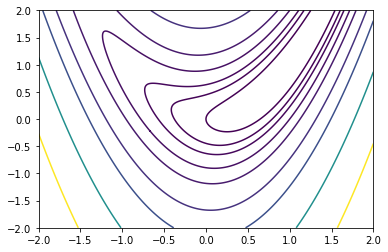

In [35]:
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])

In [36]:
adam = AdamOpt(2)
momentum = MomemtunOpt(2)
gradient_descent = gradient_descent_methods()

In [37]:
lookahead_adam = LookAheadOpt(adam)
lookahead_mom = LookAheadOpt(momentum)
lookahead_gd = LookAheadOpt(gradient_descent)

In [38]:
def generate_random(low, high):
    return np.random.random() * (high - low) + low

In [39]:
init_x = np.array([generate_random(-2, 2), generate_random(-2, 2)])

conjugate_gradient = conjugate_gradient_methods(rosen, init_x)
lookahead_cg = LookAheadOpt(conjugate_gradient)

In [40]:
def process(opt, func, x, k=2000):
    p = np.zeros((k+1,2))
    p[0] = x
    
    for i in range(k):
        x = opt.step(func, x)
        p[i+1] = x
    
    return p

In [41]:
x_adam = process(adam, rosen, init_x)
x_mom = process(momentum, rosen, init_x)
x_grad = process(gradient_descent, rosen, init_x)
x_cg = process(conjugate_gradient, rosen, init_x)

In [42]:
x_la_adam = process(lookahead_adam, rosen, init_x)
x_la_mom = process(lookahead_mom, rosen, init_x)
x_la_gd = process(lookahead_gd, rosen, init_x)
x_la_cg = process(lookahead_cg, rosen, init_x)

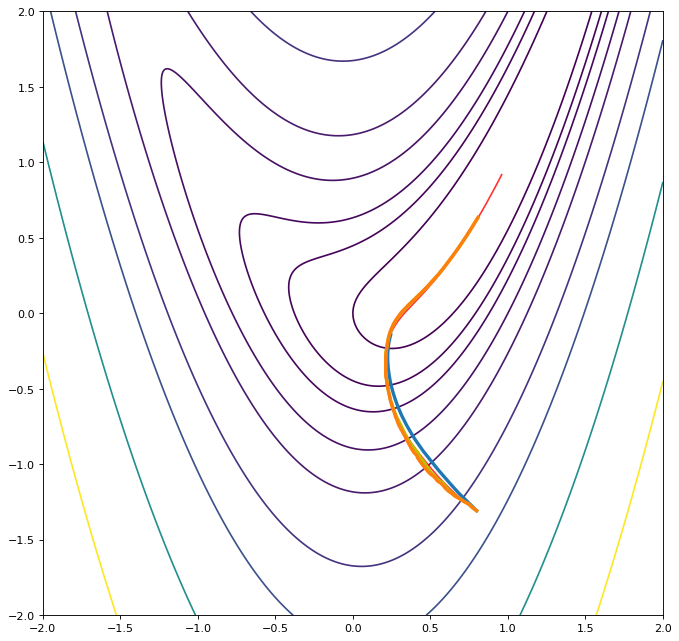

In [43]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_adam[:,0], x_adam[:,1], linewidth=3)
plt.plot(x_la_adam[:,0], x_la_adam[:,1], color='r', alpha=0.8)
plt.plot(x_grad[:,0], x_grad[:,1], linewidth=3, color = 'y')
plt.plot(x_cg[:,0], x_cg[:,1], linewidth=3)

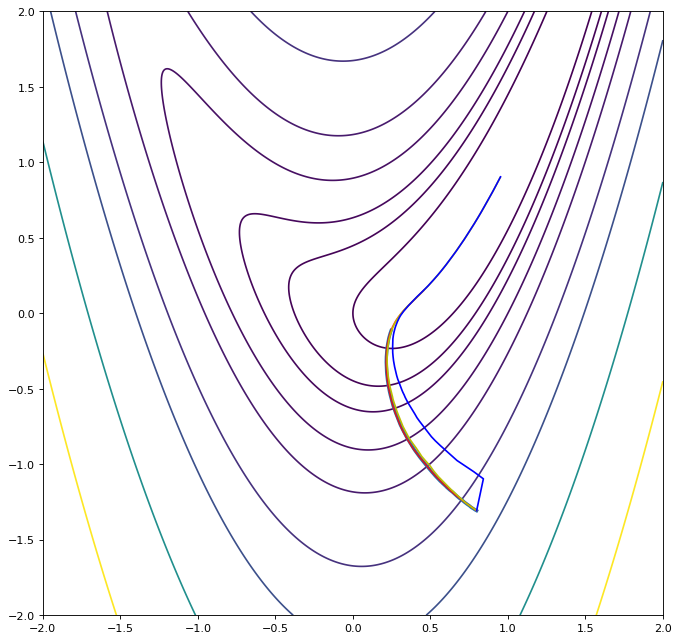

In [44]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_mom[:,0], x_mom[:,1], linewidth=3)
plt.plot(x_la_mom[:,0], x_la_mom[:,1], color='r', alpha=0.8)
plt.plot(x_la_gd[:,0], x_la_gd[:,1], color='y')
plt.plot(x_la_cg[:,0], x_la_cg[:,1], color='b')

In [ ]:
def flower(x, a=1, b=1, c=4):
    n = len(x)
    return sum(a * np.linalg.norm(x[i:i+2], axis=0) + b * np.sin(c * np.arctan2(x[i+1], x[i])) for i in range(n-1))

In [ ]:
Z_flower = flower(P)

In [ ]:
plt.contour(X, Y, Z_flower)

In [ ]:
init_x = np.array([generate_random(-2, 2), generate_random(-2, 2)])

In [ ]:
x_adam = process(adam, flower, init_x)
x_mom = process(momentum, flower, init_x)

In [ ]:
x_la_adam = process(lookahead_adam, flower, init_x)
x_la_mom = process(lookahead_mom, flower, init_x)

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z_flower, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_adam[:,0], x_adam[:,1], linewidth=3)
plt.plot(x_la_adam[:,0], x_la_adam[:,1], color='r', alpha=0.8)

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, Z_flower, [1, 2, 3, 5, 8, 15, 25, 50, 100])
plt.plot(x_mom[:,0], x_mom[:,1], linewidth=3)
plt.plot(x_la_mom[:,0], x_la_mom[:,1], color='r', alpha=0.8)